<a href="https://colab.research.google.com/github/ajdhiman/Google-Colab/blob/main/Deep_Learning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
print("Tensorflow Version:",tf.__version__)

Tensorflow Version: 2.12.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Classification Probem**

In [6]:
dataset=pd.read_csv(r'Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
x=dataset.iloc[:,3:13].values
x=pd.DataFrame(x,columns=['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary'])


In [9]:
y=dataset.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [12]:
x=x.drop(['Geography','Gender'],axis=1)

In [13]:
x=pd.concat([x,geography,gender],axis=1)

In [14]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.0,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.8,3,1,0,113931.57,0,0,0
3,699,39,1,0.0,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.1,0,1,0


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [16]:
o_features=[f for f in x_train.columns if x_train[f].dtype =='O']
for col in o_features:
    x_train[col] = x_train[col].astype(float)
    x_test[col] = x_test[col].astype(float)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU
from tensorflow.keras.layers import Dropout

In [19]:
classifier=Sequential()

In [20]:
classifier.add(Dense(units=10,activation='relu', input_shape=(11,)))

In [21]:
classifier.add(Dense(units=10,activation='relu'))

In [22]:
classifier.add(Dense(units=7,activation='relu'))

In [23]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 315
Trainable params: 315
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.0001,patience=5,verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [28]:
from imblearn.over_sampling import SMOTE
x_train = np.array(x_train)
y_train = np.array(y_train)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [29]:
#model_history=classifier.fit(np.array(x_train),y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)
model_history=classifier.fit(np.array(x_train_scaled),y_train,validation_data=(x_test_scaled,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
700/700 [==============================] - 9s 4ms/step - loss: 0.4369 - accuracy: 0.8037 - val_loss: 0.4194 - val_accuracy: 0.8173
Epoch 2/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3850 - accuracy: 0.8419 - val_loss: 0.3960 - val_accuracy: 0.8523
Epoch 3/100
700/700 [==============================] - 3s 5ms/step - loss: 0.3744 - accuracy: 0.8490 - val_loss: 0.3559 - val_accuracy: 0.8577
Epoch 4/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3640 - accuracy: 0.8531 - val_loss: 0.3574 - val_accuracy: 0.8587
Epoch 5/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3602 - accuracy: 0.8571 - val_loss: 0.3558 - val_accuracy: 0.8607
Epoch 6/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3600 - accuracy: 0.8566 - val_loss: 0.3612 - val_accuracy: 0.8567
Epoch 7/100
700/700 [==============================] - 5s 7ms/step - loss: 0.3586 - accuracy: 0.8543 - val_loss: 0.3559 - val_accuracy: 0.8580

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

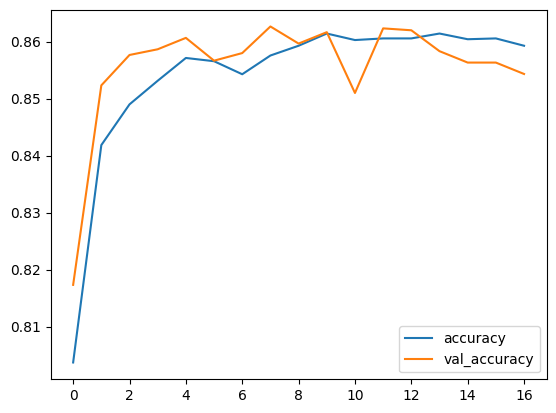

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show

In [32]:
y_pred=classifier.predict(x_test_scaled)
y_pred=(y_pred>=0.5)

94/94 [==============================] - 0s 2ms/step


In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)

In [34]:
unique_values, counts = np.unique(y_pred, return_counts=True)
for value, count in zip(unique_values, counts):
  print(f"{value}: {count}")

False: 2510
True: 490


In [35]:
cm

array([[2226,  284],
       [ 153,  337]])

In [36]:
score

0.8543333333333333

In [37]:
classifier.get_weights()

[array([[ 2.13642195e-01, -5.13560735e-02,  2.96299070e-01,
         -1.74952269e-01, -9.45454314e-02, -1.79568872e-01,
         -2.62035906e-01,  4.57724810e-01,  1.24441221e-01,
         -3.27074081e-01],
        [-1.50813818e+00, -1.71590436e+00, -2.81823218e-01,
          2.12382817e+00,  1.85183966e+00, -1.22299492e-01,
         -1.15735984e+00,  8.12357605e-01, -5.79347014e-01,
          3.11820412e+00],
        [-2.24772170e-01, -1.52731150e-01,  1.37712669e+00,
         -1.34060249e-01, -3.99557427e-02, -1.33418426e-01,
         -1.91576734e-01,  1.20880954e-01, -1.02728203e-01,
         -2.89242059e-01],
        [-3.46715242e-01,  6.81765139e-01, -1.34278372e-01,
         -1.66034430e-01,  2.69739270e-01, -1.71131468e+00,
         -5.82034349e-01, -7.95279741e-01,  9.38913524e-01,
         -3.85744572e-01],
        [ 1.60492849e+00, -1.16895819e+00,  2.00417638e-01,
          2.80219173e+00, -1.15635715e-01, -7.31751680e-01,
          2.31751823e+00, -6.05643809e-01, -1.797801

In [38]:
classifier.save_weights('model_weights.h5')

**Regression Problem**

In [116]:
dataset=pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True,names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'])
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [117]:
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [118]:
dataset = dataset.dropna()

In [119]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [125]:
dataset=pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='',drop_first=True)

In [126]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,1


In [130]:
x=dataset.iloc[:,1:10]
y=dataset.iloc[:,0]

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU
from tensorflow.keras.layers import Dropout

In [141]:
model=Sequential()
model.add(Dense(units=8,activation='relu', input_shape=(8,)))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=1,activation='linear'))

In [142]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 72        
                                                                 
 dense_21 (Dense)            (None, 10)                90        
                                                                 
 dense_22 (Dense)            (None, 7)                 77        
                                                                 
 dense_23 (Dense)            (None, 1)                 8         
                                                                 
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [143]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

mse_loss=tf.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)

mse_metrics=tf.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [144]:
model.compile(optimizer=opt,loss=mse_loss,metrics=['mae'])

In [145]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="mae",min_delta=0.0001,patience=10,verbose=1,mode="auto",baseline=None,restore_best_weights=False)


In [146]:
model_history=model.fit(np.array(x_train_scaled),y_train,validation_data=(x_test_scaled,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
28/28 [==============================] - 3s 11ms/step - loss: 451.9219 - mae: 19.3633 - val_loss: 182.6700 - val_mae: 12.0146
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 56.0896 - mae: 5.8814 - val_loss: 22.9477 - val_mae: 3.7518
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 14.1806 - mae: 2.7989 - val_loss: 12.2496 - val_mae: 2.5153
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 9.6912 - mae: 2.2400 - val_loss: 11.2125 - val_mae: 2.2907
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 9.4135 - mae: 2.2040 - val_loss: 9.9517 - val_mae: 2.2128
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 9.7111 - mae: 2.2603 - val_loss: 13.1706 - val_mae: 2.6316
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 9.3937 - mae: 2.1759 - val_loss: 9.2846 - val_mae: 2.1278
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - los

In [147]:
model_history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

<function matplotlib.pyplot.show(close=None, block=None)>

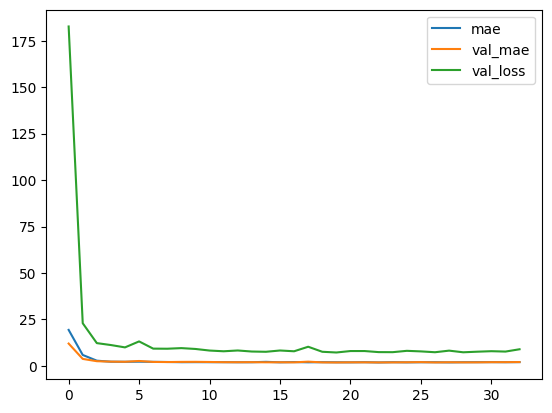

In [148]:
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.plot(model_history.history['val_loss'])
plt.legend(['mae','val_mae','val_loss'])
plt.show

In [149]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [150]:
y_pred

array([[29.96634  ],
       [23.585491 ],
       [12.191392 ],
       [35.777603 ],
       [32.819794 ],
       [19.371511 ],
       [34.901413 ],
       [27.872728 ],
       [18.444866 ],
       [24.384838 ],
       [27.646786 ],
       [13.872722 ],
       [24.115492 ],
       [11.924136 ],
       [16.475067 ],
       [31.05505  ],
       [22.49854  ],
       [12.641889 ],
       [24.260168 ],
       [25.552086 ],
       [16.107061 ],
       [16.368242 ],
       [20.00409  ],
       [24.626102 ],
       [31.33301  ],
       [12.9202585],
       [28.12072  ],
       [25.568005 ],
       [18.917702 ],
       [14.235244 ],
       [15.826186 ],
       [30.376987 ],
       [22.92117  ],
       [28.392223 ],
       [19.23936  ],
       [25.773216 ],
       [28.852081 ],
       [13.4928465],
       [14.639779 ],
       [12.545459 ],
       [13.682928 ],
       [32.658566 ],
       [29.094149 ],
       [13.378416 ],
       [28.339027 ],
       [14.987036 ],
       [30.073725 ],
       [12.33

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [152]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [153]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 8.948062955645234
Root Mean Squared Error: 2.9913313015520755
Mean Absolute Error: 2.059103522866459
R-squared Score: 0.8545398359173232
